# Grupo: 3
Bruno Dueñas, Fernando Mejía, Mateo Córdova

(1.000001000001e-05, 10.88786282657364, 1999999)

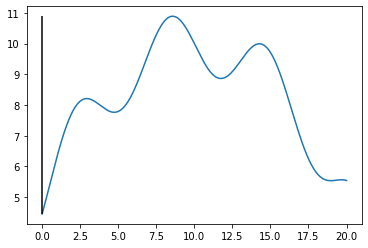

In [1]:
# Do imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Code here
a, b = 0, 20
epsilon = 0.00001  # This the error we want to allow
x = np.linspace(a, b, int((b-a)/epsilon))
def f(x): return -(np.sin(x-10) + 0.05*(x-10)**2) + 10
y = f(x)
plt.plot(x, y)
len(x)
max_x, max_y = x[1], y.max()
plt.vlines(max_x, y.min(), max_y, 'k')
max_x, max_y, len(x)

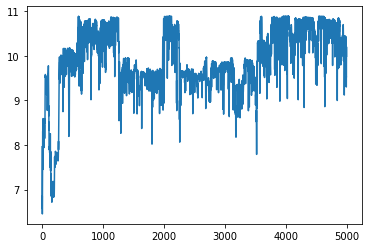

In [2]:
individual_size = 16  # individuals size
pop_size = 10  # number of individuals
generations = 5000
mutation_probability = 0.005
n_gen = [0, 10, 100, 200, 500]
gener = []

def min_max_normalization(x, min_x, max_x, a, b):
    # Reescale between a and b
    return a + ((x-min_x)*(b-a)) / (max_x - min_x)

# fitness function
def f(x): return -(np.sin(x-10) + 0.05*(x-10)**2) + 10

def change_gene(gene, p_mut):
    gene = int(gene)
    if np.random.random() < p_mut:
        gene ^= 1

    return str(gene)

def mutate(individual, p_mut=0):
    return ''.join(change_gene(c, p_mut) for c in individual)


a, b = 0, 20
min_value = int('0'*16, 2)
max_value = int('1'*16, 2)

# Generate initial population
population = bernoulli.rvs(p=0.1, size=(pop_size, individual_size))
pop_str = [''.join(ind.astype('str')) for ind in population]
pop_dec = np.array([int(ind, 2) for ind in pop_str])
pop_norm = min_max_normalization(pop_dec, min_value, max_value, a, b)

f_mean = [f(pop_norm.mean())]  # mean of the individuals, fitnees of pop

x = []

for gi in range(generations):
    pop_fitness = f(pop_norm)
    pop_probability = pop_fitness / pop_fitness.sum()

    # generate childs
    new_pop = []
    for i in range(pop_size//2):
        parents = np.random.choice(pop_str, p=pop_probability, size=2)
        cross_point = np.random.randint(individual_size)
        child1 = parents[0][:cross_point] + parents[1][cross_point:]
        child2 = parents[1][:cross_point] + parents[0][cross_point:]
        new_pop += [child1, child2]
    pop_str = [mutate(individual, mutation_probability) 
    for individual in new_pop]
    pop_dec = np.array([int(ind, 2) for ind in pop_str])
    pop_norm = min_max_normalization(pop_dec, min_value, max_value, a, b)
    # best individual of population
    x += [pop_norm[np.where(pop_norm == pop_norm.max())[0][0]]] 
    
    f_mean += [f(pop_norm).mean()]

    if gi in n_gen:
        gener.append(x.copy())

plt.plot(f_mean)


## Dibujar (en un gráfico) con las mejores soluciones en X para cada generación

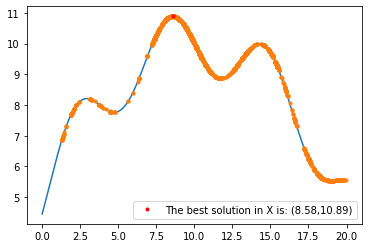

In [3]:
y_maximo = max(f(np.array(x)))
x1 = np.linspace(a, b, int((b-a)/epsilon))
y1 = f(x1)
plt.plot(x1, y1)
plt.plot(x, f(np.array(x)), '.')
for i in x:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='red', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break

plt.legend()
plt.show()

## Devuelva el mejor valor de X encontrada por el algoritmos genético, donde f(X) es el máximo (esta es la solución al problema).

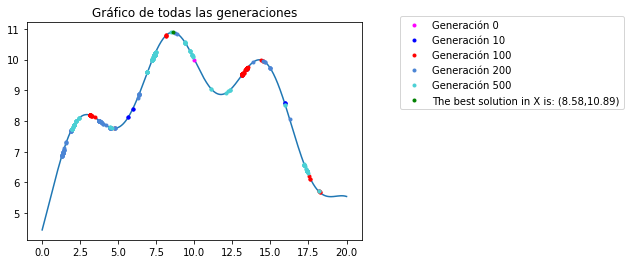

In [4]:
y_maximo = max(f(np.array(x)))
len(gener)
g0 = []
g1 = []
g2 = []
g3 = []

plt.plot(x1, y1)
# Generacion 0
plt.plot(gener[0], f(np.array(gener[0])), '.', color= 'magenta', label='Generación 0')
# Generacion 10
for e in gener[1]:
    if e not in gener[0]:
        g0.append(e)
plt.plot(g0, f(np.array(g0)), '.', color= 'blue', label='Generación 10')
# Generacion 100
for e in gener[2]:
    if e not in gener[1] and e not in gener[0]:
        g1.append(e)
plt.plot(g1, f(np.array(g1)), '.', color= 'red', label='Generación 100')
# Generacion 200
for e in gener[3]:
    if e not in gener[2] and e not in gener[1] and e not in gener[0]:
        g2.append(e)
plt.plot(g2, f(np.array(g2)), '.', color= '#4B85D5', label='Generación 200')
#Generacion 500
for e in gener[4]:
    if e not in gener[3] and e not in gener[2] and e not in gener[1] and e not in gener[0]:
        g3.append(e)
plt.plot(g3, f(np.array(g3)), '.', color= '#4BD0D5', label='Generación 500')

for i in x:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='green', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break
plt.title('Gráfico de todas las generaciones')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

## Dibujar las soluciones individuales en el tiempo, 10 individuos de la población como una pareja de valores x, fx(x) (generación 0, 10, 100, 200, 500).

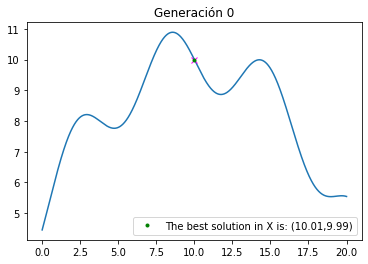

In [5]:
plt.plot(x1, y1)
# Generacion 0
y_maximo = max(f(np.array(gener[0])))
plt.plot(gener[0], f(np.array(gener[0])), 'x', color= 'magenta')
for i in gener[0]:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='green', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break
plt.title('Generación 0')
plt.legend()
plt.show()


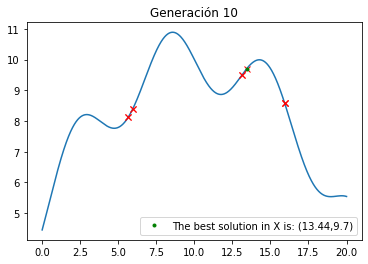

In [6]:
plt.plot(x1, y1)
#Generacion 10
generation = []
for e in gener[1]:
    if e not in gener[0]:
        generation.append(e)

plt.plot(generation, f(np.array(generation)), 'x', color= 'red')
y_maximo = max(f(np.array(generation)))
for i in generation:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='green', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break
plt.title('Generación 10')
plt.legend()
plt.show()

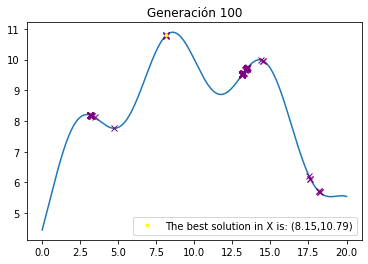

In [7]:
plt.plot(x1, y1)
#Generacion 100
generation = []
for e in gener[2]:
    if e not in gener[1] and e not in gener[0]:
        generation.append(e)
y_maximo = max(f(np.array(generation)))
plt.plot(generation, f(np.array(generation)), 'x', color= 'purple')
for i in generation:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='yellow', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break
plt.title('Generación 100')
plt.legend()
plt.show()

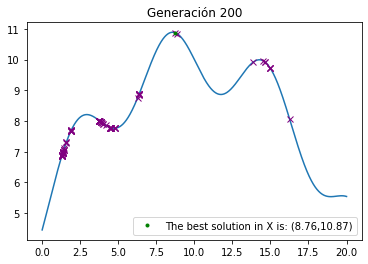

In [8]:
plt.plot(x1, y1)
#Generacion 200
generation = []
for e in gener[3]:
    if e not in gener[2] and e not in gener[1] and e not in gener[0]:
        generation.append(e)
plt.plot(generation, f(np.array(generation)), 'x', color= 'purple')
y_maximo = max(f(np.array(generation)))
for i in generation:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='green', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break
plt.title('Generación 200')
plt.legend()
plt.show()

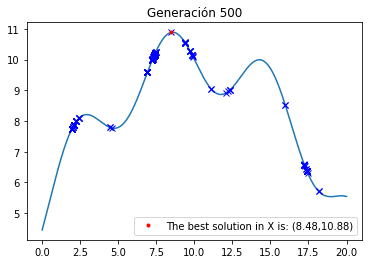

In [9]:
plt.plot(x1, y1)
#Generacion 500
generation = []
for e in gener[4]:
    if e not in gener[3] and e not in gener[2] and e not in gener[1] and e not in gener[0]:
        generation.append(e)
plt.plot(generation, f(np.array(generation)), 'x', color= 'blue')
y_maximo = max(f(np.array(generation)))
for i in generation:
    if(f(i)==y_maximo):
        plt.plot(i, f(i), '.', color='red', label=
        'The best solution in X is: ('+ str(i.round(2))+','+str((f(i)).round(2))+')')
        break
plt.title('Generación 500')
plt.legend()
plt.show()